In [1]:
%matplotlib inline


# Linear regression

We are going to look at the relationship between age and
minutes played. Start by watching the video a

..  youtube:: TnOqoeVPnXE
   :width: 640
   :height: 349

Either work through the code at the same time as watching or afterwards.


In [18]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

import matplotlib.patheffects as path_effects

from PIL import Image
import requests
from io import BytesIO
import highlight_text
from highlight_text import htext
from highlight_text import HighlightText, ax_text, fig_text

## Opening data
In this example we use data downloaded from [FBref](https://fbref.com/en/comps/12/2021-2022/stats/2021-2022-La-Liga-Stats) on players in La Liga.
We just use the age and minutes played columns.
And we only take the first 20 observations, to help visualise the process.
Download [playerstats.csv](https://github.com/soccermatics/Soccermatics/blob/main/course/lessons/lesson2/playerstats.csv)
your working directory.



In [31]:
num_obs=617
laliga_df=pd.read_csv("playerstats.csv",delimiter=',')
#display(laliga_df.count())
minutes_model = pd.DataFrame()
minutes_model = minutes_model.assign(minutes=laliga_df['Min'][0:num_obs])
minutes_model = minutes_model.assign(age=laliga_df['Age'][0:num_obs])

# Make an age squared column so we can fir polynomial model.
minutes_model = minutes_model.assign(age_squared=np.power(laliga_df['Age'][0:num_obs],2))

## Plotting the data
Start by plotting the data.



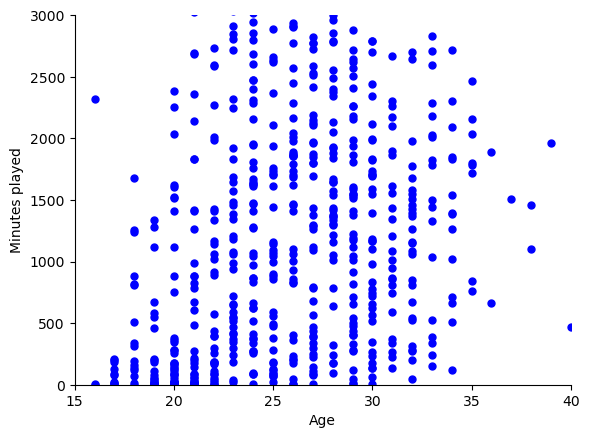

In [32]:
fig,ax=plt.subplots(num=1)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))
plt.show()

## Fitting the model
We are going to begin by doing a  straight line linear regression
 .. math::

    y = b_0 + b_1 x

A straight line relationship between minutes played and age.



In [33]:
model_fit=smf.ols(formula='minutes  ~ age   ', data=minutes_model).fit()
print(model_fit.summary())        
b=model_fit.params

                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     73.92
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           6.77e-17
Time:                        21:07:58   Log-Likelihood:                -5070.1
No. Observations:                 616   AIC:                         1.014e+04
Df Residuals:                     614   BIC:                         1.015e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -536.3642    207.420     -2.586      0.0

Comparing the fit 
 ----------------------------
We now use the fit to plot a line through the data.
 .. math::

    y = b_0 + b_1 x

where the parameters are estimated from the model fit.



C:\Users\acer\AppData\Local\Temp\ipykernel_11508\3444358867.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = b[0] + b[1] * x


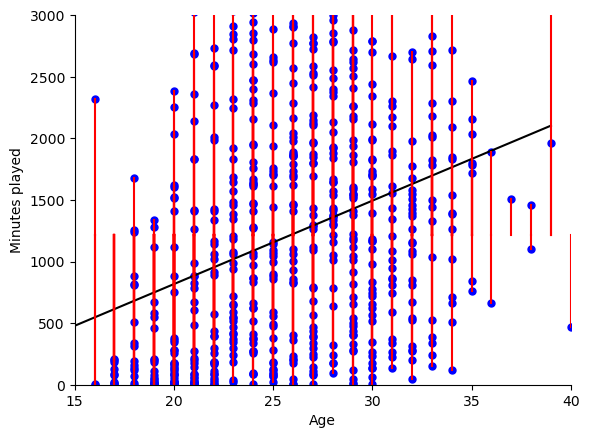

In [34]:
#First plot the data as previously
fig,ax=plt.subplots(num=1)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))

#Now create the line through the data
x=np.arange(40,step=1)
#y= np.mean(minutes_model['minutes'])*np.ones(40)
y = b[0] + b[1] * x
ax.plot(x, y, color='black')

#Show distances to line for each point
for i,a in enumerate(minutes_model['age']):
    ax.plot([a,a],[minutes_model['minutes'][i], np.mean(minutes_model['minutes']) ], color='red')
plt.show()

A model including squared terms
 ----------------------------
We now fit the quadratic model
 .. math::

    y = b_0 + b_1 x + b_2 x^2

estimating the parameters from the data.



                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     51.35
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           2.41e-21
Time:                        21:08:07   Log-Likelihood:                -5057.4
No. Observations:                 616   AIC:                         1.012e+04
Df Residuals:                     613   BIC:                         1.013e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5255.8833    951.226     -5.525      

C:\Users\acer\AppData\Local\Temp\ipykernel_11508\3394618910.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y= b[0] + b[1]*x + b[2]*x*x
C:\Users\acer\AppData\Local\Temp\ipykernel_11508\3394618910.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot([a,a],[minutes_model['minutes'][i], b[0] + b[1]*a + b[2]*a*a], color='red')


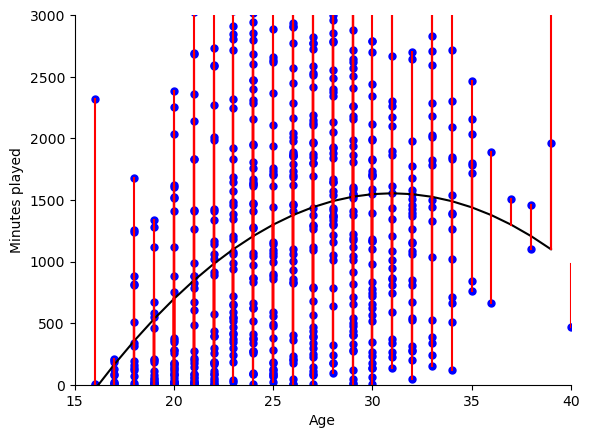

In [35]:
# First fit the model
model_fit=smf.ols(formula='minutes  ~ age + age_squared  ', data=minutes_model).fit()
print(model_fit.summary())        
b=model_fit.params

# Compare the fit 
fig,ax=plt.subplots(num=1)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))
x=np.arange(40,step=1)
y= b[0] + b[1]*x + b[2]*x*x
ax.plot(x, y, color='black')

for i,a in enumerate(minutes_model['age']):
    ax.plot([a,a],[minutes_model['minutes'][i], b[0] + b[1]*a + b[2]*a*a], color='red')
plt.show()

## Now try with all data points
1) Refit the model with all data points

2) Try adding a cubic term

3) Think about how well the model works. What are the limitations?



## A model including squared and cubic terms
We now fit the quadratic model .. math::

y = b_0 + b_1 x + b_2 x^2 + b_3 x^3
estimating the parameters from the data.

                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     34.82
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           8.73e-21
Time:                        21:17:18   Log-Likelihood:                -5056.6
No. Observations:                 616   AIC:                         1.012e+04
Df Residuals:                     612   BIC:                         1.014e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.024e+04   4002.240     -2.559      

C:\Users\acer\AppData\Local\Temp\ipykernel_11508\3005244511.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y= b[0] + b[1]*x + b[2]*x*x + b[3]*x*x*x
C:\Users\acer\AppData\Local\Temp\ipykernel_11508\3005244511.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot([a,a],[minutes_model_cubed['minutes'][i], b[0] + b[1]*a + b[2]*a*a + b[3]*a*a*a], color='red')


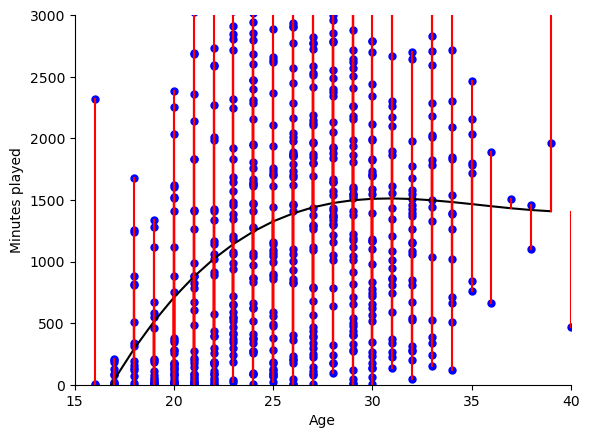

In [40]:
# First fit the model
num_obs=617
laliga_df=pd.read_csv("playerstats.csv",delimiter=',')
minutes_model_cubed = pd.DataFrame()
minutes_model_cubed = minutes_model_cubed.assign(minutes=laliga_df['Min'][0:num_obs])
minutes_model_cubed = minutes_model_cubed.assign(age=laliga_df['Age'][0:num_obs])
minutes_model_cubed = minutes_model_cubed.assign(age_squared=np.power(laliga_df['Age'][0:num_obs],2))
minutes_model_cubed = minutes_model_cubed.assign(age_cubed=np.power(laliga_df['Age'][0:num_obs],3))
model_fit=smf.ols(formula='minutes  ~ age + age_squared + age_cubed  ', data=minutes_model_cubed).fit()
print(model_fit.summary())        
b=model_fit.params

# Compare the fit 
fig,ax=plt.subplots(num=1)
ax.plot(minutes_model_cubed['age'], minutes_model_cubed['minutes'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))
x=np.arange(40,step=1)
y= b[0] + b[1]*x + b[2]*x*x + b[3]*x*x*x
ax.plot(x, y, color='black')


for i,a in enumerate(minutes_model_cubed['age']):
    ax.plot([a,a],[minutes_model_cubed['minutes'][i], b[0] + b[1]*a + b[2]*a*a + b[3]*a*a*a], color='red')
plt.show()